# Ejercicio 7
Se realiza el análisis del directorio que contiene el documento y se extraen los términos del mismo.

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline
from matplotlib import pyplot as plt
from tokenizador_ej7 import Tokenizador

tokenizador = Tokenizador("cervantes", None, False, None, 3, 15)
tokenizador.analizar_directorio()

ANÁLISIS DE DOCUMENTOS EN PROGRESO
ANÁLISIS DE DOCUMENTOS FINALIZADO


True

Se generan dos listas con las cantidades de términos procesados y de terminos únicos por cada termino procesado.

In [33]:
terminos_procesados = [x[0] for x in tokenizador.lista_terminos_procesados_unicos]
terminos_unicos = [x[1] for x in tokenizador.lista_terminos_procesados_unicos]

Con ambas listas se genera el gráfico en donde se puede ver el crecimiento en la cantidad de términos únicos a medida que aumentan los términos procesados.

In [34]:
figura, grafico = plt.subplots()
grafico.plot(terminos_procesados, terminos_unicos, color="b", linewidth=2)
grafico.grid(True)
grafico.set_xlabel("T. Procesados")
grafico.set_ylabel(u"T. Únicos")
figura.show()

Se definen dos funciones: Una que estima el crecimiento del vocabulario según la ley de Heaps y otra que grafica varias estimaciones en el mismo gráfico para compararlas con medición real.

In [35]:
def calcular_estimacion_heaps(terminos_procesados, param_k, param_b):
    terminos_unicos = []
    for cantidad_procesada in terminos_procesados:
        terminos_unicos.append(param_k * pow(cantidad_procesada, param_b))
    return terminos_unicos

def graficar_predicciones_heaps(lista_predicciones, terminos_procesados, terminos_unicos, colores):
    figura, grafico = plt.subplots()
    for indice, prediccion in enumerate(lista_predicciones):
        grafico.plot(terminos_procesados, prediccion[2], color=colores[indice], linewidth=1, linestyle="--",
                     label="k: "+str(prediccion[0])+" | b: "+str(prediccion[1]))
    grafico.plot(terminos_procesados, terminos_unicos, color="b", linewidth=1, label="Real")
    grafico.legend(loc="upper left")
    grafico.grid(True)
    grafico.set_xlabel("T. Procesados")
    grafico.set_ylabel(u"T. Únicos")
    figura.show()

Se establecen los parámetros de Heaps a evaluar y se realizan las estimaciones y gráficos correspondientes.

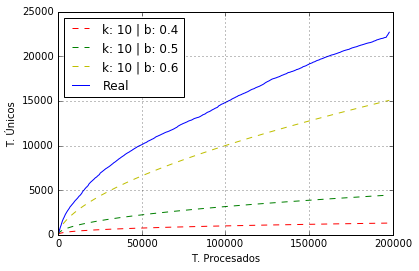

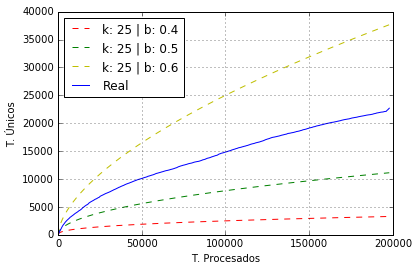

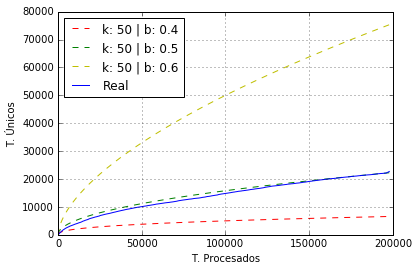

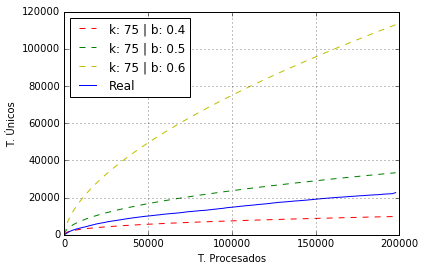

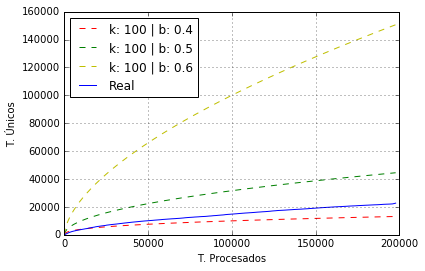

In [36]:
params_k = [10, 25, 50, 75, 100]
params_b = [0.4, 0.5, 0.6]

colores = ["r","g","y"]

for param_k in params_k:
    lista_predicciones_heaps = []
    for param_b in params_b:
        lista_predicciones_heaps.append([param_k, param_b, calcular_estimacion_heaps(terminos_procesados, param_k, param_b)])
    graficar_predicciones_heaps(lista_predicciones_heaps, terminos_procesados, terminos_unicos, colores)

De todas las estimaciones graficadas, la que mas se asemeja a los datos obtenidos del análisis es la que tiene como parámetros k = 50 y b = 0,5